# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Nathanael Jeshua Paat
- Email: nathanaeljeshua@gmail.com
- Id Dicoding: naeljeshua

# Menentukan Pertanyaan Bisnis
- Bagaimana hasil penyewaan dalam dua tahun?
- Bagaiman tren penyewaan dalam dua tahun per bulan?
- Kapan jam puncak penyewaan sepeda terjadi pada tahun 2012?
- Jenis hari apa yang memiliki jumlah penyewaan terbesar?
- Kondisi cuaca apa yang memiliki jumlah penyewaan terbanyak?

# Menyiapkan Library yang Dibutuhkan

In [2]:
import numpy as np
import pandas as pd
import datetime 
import os
import matplotlib.pyplot as plt
import streamlit as slt
import seaborn as sns
import scipy as scpy
import pipreqsnb

# Data Wrangling

# Gathering Data

In [3]:
#Dataframe Hour
hour_df=pd.read_csv("./data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
#Dataframe Day
day_df=pd.read_csv("./data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


# Assesing Data

In [5]:
#Memeriksa tipe data kolom dataframe hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
#Memeriksa tipe data kolom dataframe day
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
#Memeriksa data duplikasi dan parameter statistik pada dataframe day
print("Jumlah duplikasi pada dataframe day adalah", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi pada dataframe day adalah 0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
#Memeriksa data duplikasi dan parameter statistik pada dataframe hour
print("Jumlah duplikasi pada dataframe hour adalah", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi pada dataframe hour adalah 0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Hasil dari assesing data pada kedua dataframe adalah tidak ada missing values dan duplikasi data. Namun, terdapat tipe data yang harus diubah yaitu tipe data kolom dateday yang merupakan object pada awalnya. Parameter statistik pada kedua dataframe juga sudah aman

# Cleaning Data

In [9]:
#Mengganti tipe data dateday (kolom dteday) dari object menjadi date time
datetime_columns=["dteday"]

for columns in datetime_columns:
    day_df[columns]=pd.to_datetime(day_df[columns])
    hour_df[columns]=pd.to_datetime(hour_df[columns])

In [10]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

# Exploratory Data Analysis

Explore Dataframe Day

In [12]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Pelanggan dari usaha penyewaan sepeda terbagi dalam casual dan registered users. Rata-rata pelanggan per hari adalah 4548 dengan didominasi oleh registered users.

In [13]:
day_df.groupby(by='yr').cnt.nunique().sort_values(ascending=False)

yr
1    356
0    352
Name: cnt, dtype: int64

Terjadi peningkatan pelanggan dari tahun 2011 ke 2012 dengan peningkatan sebanyak 4 pelanggan

In [14]:
day_df.groupby(by='mnth').cnt.nunique().sort_values(ascending=False)

mnth
1     62
5     62
7     62
8     62
10    62
12    62
3     60
4     60
6     60
9     60
11    60
2     57
Name: cnt, dtype: int64

In [15]:
day_df.groupby(by='workingday').cnt.nunique().sort_values(ascending=False)

workingday
1    487
0    223
Name: cnt, dtype: int64

Penyewaan sepeda lebih banyak terjadi saat hari kerja

In [16]:
day_df.groupby(by='weathersit').cnt.nunique().sort_values(ascending=False)

weathersit
1    451
2    243
3     21
Name: cnt, dtype: int64

In [17]:
day_df.groupby(by='weathersit')['cnt'].mean().sort_values(ascending=False)

weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64

Rata-rata penyewaan sepeda saat cuaca Clear, Few clouds, dan Partly cloudy lebih tinggi daripada cuaca lainnya yaitu 4876 . Total penyewaan tertinggi juga ada pada cuaca Clear, Few clouds, dan Partly cloudy dengan total 451.

Explore Dataframe Hour

In [18]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [19]:
hour_df.groupby(by='hr').cnt.nunique().sort_values(ascending=False)

hr
17    494
18    471
8     467
19    423
16    414
14    385
12    383
15    383
13    377
7     374
20    360
11    337
9     322
10    312
21    294
22    252
23    196
6     187
0     162
1     120
2     100
3      60
5      58
4      25
Name: cnt, dtype: int64

In [20]:
hour_df.groupby(by='hr')['cnt'].mean().sort_values(ascending=False)

hr
17    461.452055
18    425.510989
8     359.011004
16    311.983562
19    311.523352
13    253.661180
12    253.315934
15    251.233196
14    240.949246
20    226.030220
9     219.309491
7     212.064649
11    208.143054
10    173.668501
21    172.314560
22    131.335165
23     87.831044
6      76.044138
0      53.898072
1      33.375691
2      22.869930
5      19.889819
3      11.727403
4       6.352941
Name: cnt, dtype: float64

Puncak penyewaan sepeda ada pada hour ke-17 dengan total jumlah pelanggan yaitu 494 dan dengan rata-rata pelanggan yaitu 461

# Visualization dan Explanatory Analysis

In [21]:
colors=['#6d7a71','#ba806a', '#cdd9c5']
color_1='#6d7a71'
color_2='#ba806a'

Pertanyaan 1:
- Bagaimana hasil penyewaan sepeda dalam dua tahun?

In [22]:
#Buat Dataframe Year
year_df= day_df.groupby('yr')['cnt'].sum().reset_index()
nama_tahun = {
    0: '2011',
    1: '2012',
}
year_df['tahun'] = year_df['yr'].map(nama_tahun)
print (year_df)

   yr      cnt tahun
0   0  1243103  2011
1   1  2049576  2012


C:\Users\Nathanael JeshuaPaat\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nathanael JeshuaPaat\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nathanael JeshuaPaat\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


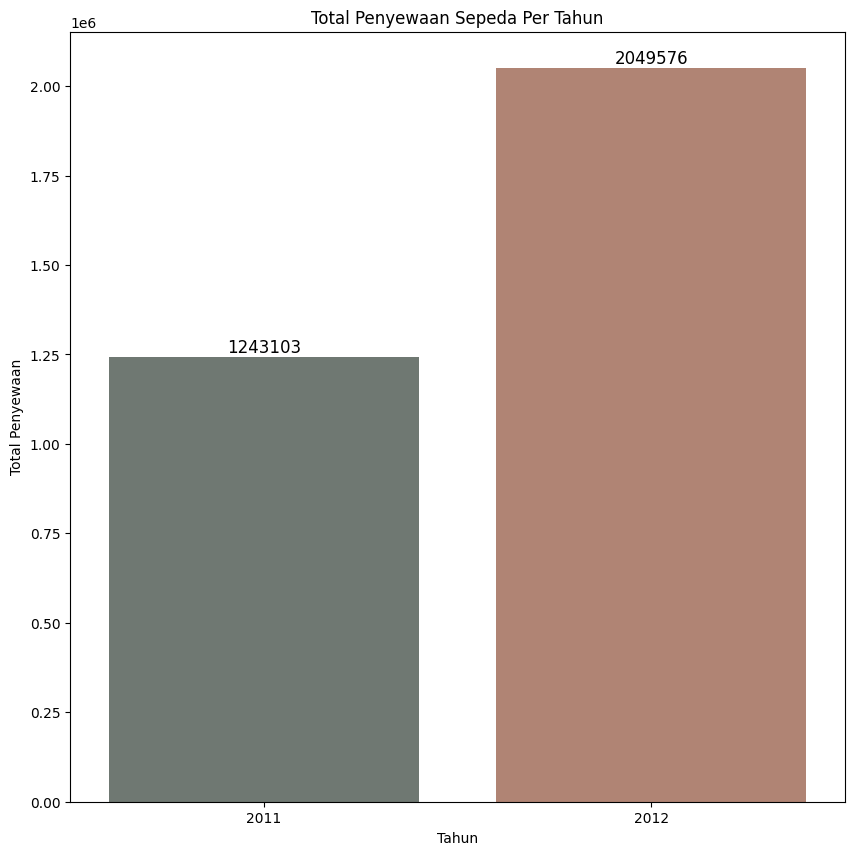

In [23]:
plt.figure(figsize=(10, 10))
cx = sns.barplot(x='tahun', y='cnt', data=year_df, errorbar=None, palette=colors)

#Menambahkan label di atas setiap bar
for p in cx.patches:
    cx.annotate(f'{round(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 7), textcoords='offset points', fontsize=12)

plt.title('Total Penyewaan Sepeda Per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Penyewaan')
plt.show()

Pertanyaan 2:
- Bagaiman tren penyewaan dalam dua tahun per bulan?

In [24]:
#Buat Dataframe Bulan
monthly_data_year_1 = day_df[day_df['yr'] == 1].groupby('mnth')['cnt'].mean().reset_index()
monthly_data_year_1['year'] = 1
monthly_data_year_2 = day_df[day_df['yr'] == 0].groupby('mnth')['cnt'].mean().reset_index()
monthly_data_year_2['yr'] = 0
nama_bulan = {
    1: 'Januari',
    2: 'Februari',
    3: 'Maret',
    4: 'April',
    5: 'Mei',
    6: 'Juni',
    7: 'Juli',
    8: 'Agustus',
    9: 'September',
    10: 'Oktober',
    11: 'November',
    12: 'Desember'
}
monthly_data_year_1['bulan'] = monthly_data_year_1['mnth'].map(nama_bulan)
monthly_data_year_2['bulan'] = monthly_data_year_2['mnth'].map(nama_bulan)
print (monthly_data_year_1)
print (monthly_data_year_2)

    mnth          cnt  year      bulan
0      1  3120.774194     1    Januari
1      2  3556.448276     1   Februari
2      3  5318.548387     1      Maret
3      4  5807.466667     1      April
4      5  6318.225806     1        Mei
5      6  6761.000000     1       Juni
6      7  6567.967742     1       Juli
7      8  6919.451613     1    Agustus
8      9  7285.766667     1  September
9     10  6414.225806     1    Oktober
10    11  5088.800000     1   November
11    12  3990.741935     1   Desember
    mnth          cnt  yr      bulan
0      1  1231.903226   0    Januari
1      2  1721.964286   0   Februari
2      3  2065.967742   0      Maret
3      4  3162.333333   0      April
4      5  4381.322581   0        Mei
5      6  4783.733333   0       Juni
6      7  4559.387097   0       Juli
7      8  4409.387097   0    Agustus
8      9  4247.266667   0  September
9     10  3984.225806   0    Oktober
10    11  3405.566667   0   November
11    12  2816.870968   0   Desember


C:\Users\Nathanael JeshuaPaat\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nathanael JeshuaPaat\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nathanael JeshuaPaat\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nathanael JeshuaPaat\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_n

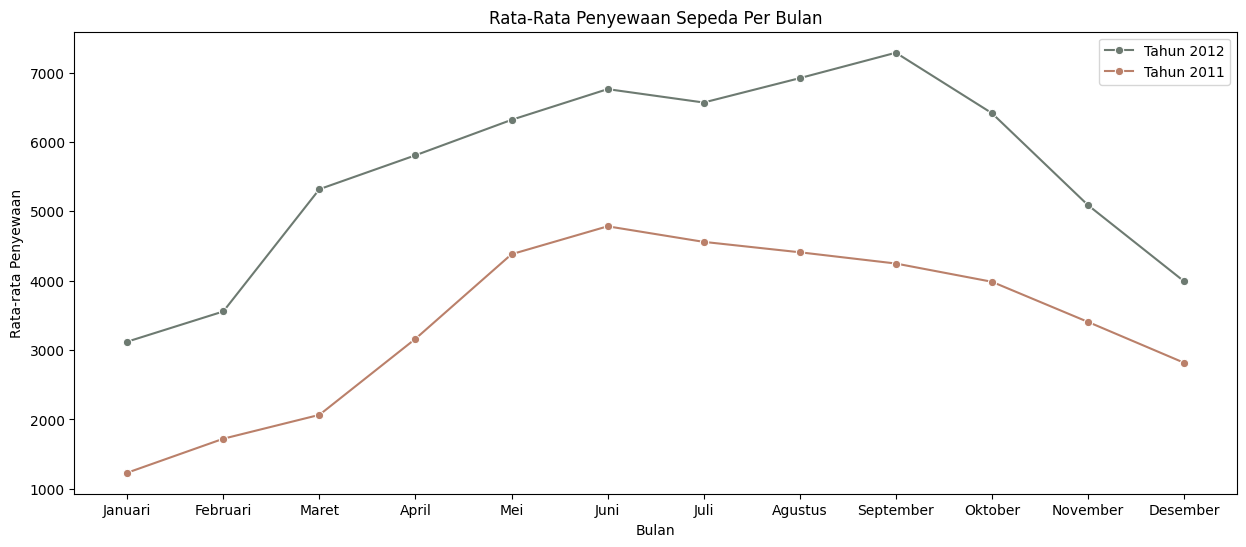

In [25]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='bulan', y='cnt',data=monthly_data_year_1, marker='o', label='Tahun 2012', color=color_1)
sns.lineplot(x='bulan', y='cnt',data=monthly_data_year_2, marker='o', label='Tahun 2011', color=color_2)
plt.title('Rata-Rata Penyewaan Sepeda Per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

Pertanyaan 3:
- Kapan jam puncak penyewaan sepeda terjadi?

In [26]:
#Buat Dataframe Hour Rental
hour_rentals= pd.DataFrame({
    'Hour': hour_df['hr'].unique(), 
    'Mean': hour_df.groupby('hr')['cnt'].mean().values,
    'Sum': hour_df.groupby('hr')['cnt'].sum().values
})

print(hour_rentals)

    Hour        Mean     Sum
0      0   53.898072   39130
1      1   33.375691   24164
2      2   22.869930   16352
3      3   11.727403    8174
4      4    6.352941    4428
5      5   19.889819   14261
6      6   76.044138   55132
7      7  212.064649  154171
8      8  359.011004  261001
9      9  219.309491  159438
10    10  173.668501  126257
11    11  208.143054  151320
12    12  253.315934  184414
13    13  253.661180  184919
14    14  240.949246  175652
15    15  251.233196  183149
16    16  311.983562  227748
17    17  461.452055  336860
18    18  425.510989  309772
19    19  311.523352  226789
20    20  226.030220  164550
21    21  172.314560  125445
22    22  131.335165   95612
23    23   87.831044   63941


C:\Users\Nathanael JeshuaPaat\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nathanael JeshuaPaat\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nathanael JeshuaPaat\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Nathanael JeshuaPaat\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

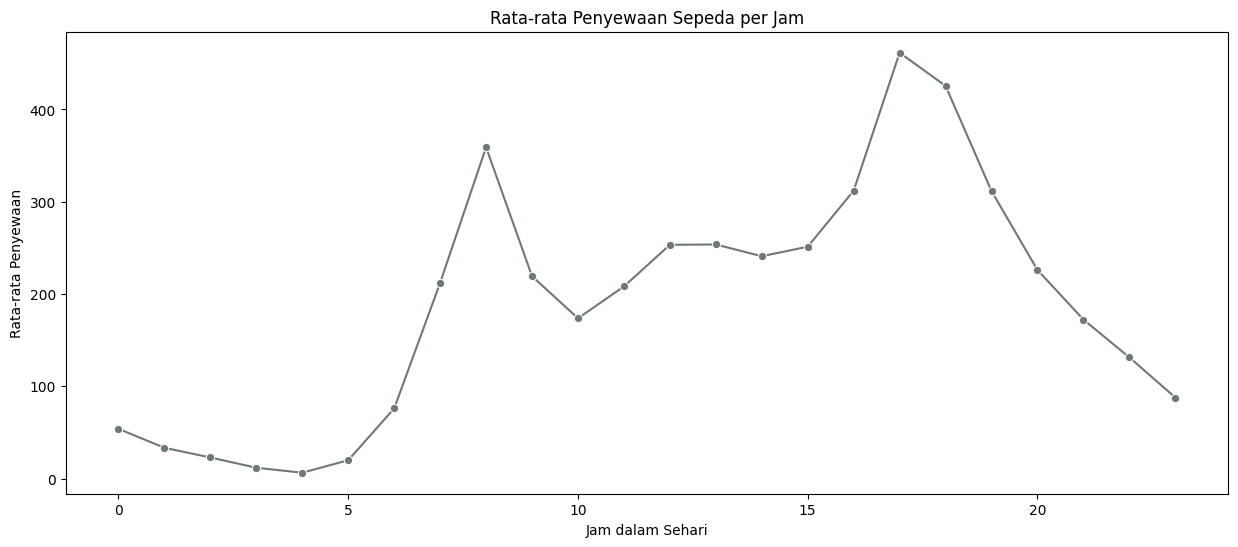

In [27]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='Hour', y='Mean',data=hour_rentals, marker='o', color=color_1)
plt.title('Rata-rata Penyewaan Sepeda per Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

Pertanyaan 4:
- Jenis hari apa yang memiliki jumlah penyewaan terbesar?

In [28]:
#Buat Dataframe Working Daya
workingday_df= day_df.groupby('workingday')['cnt'].sum().reset_index()
nama_jenis_hari = {
    0: 'Libur',
    1: 'Kerja',
}
workingday_df['jenis_hari'] = workingday_df['workingday'].map(nama_jenis_hari)
print (workingday_df)
workingday_df.to_csv('workingday_rentals.csv', index=False)

   workingday      cnt jenis_hari
0           0  1000269      Libur
1           1  2292410      Kerja


C:\Users\Nathanael JeshuaPaat\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nathanael JeshuaPaat\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nathanael JeshuaPaat\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


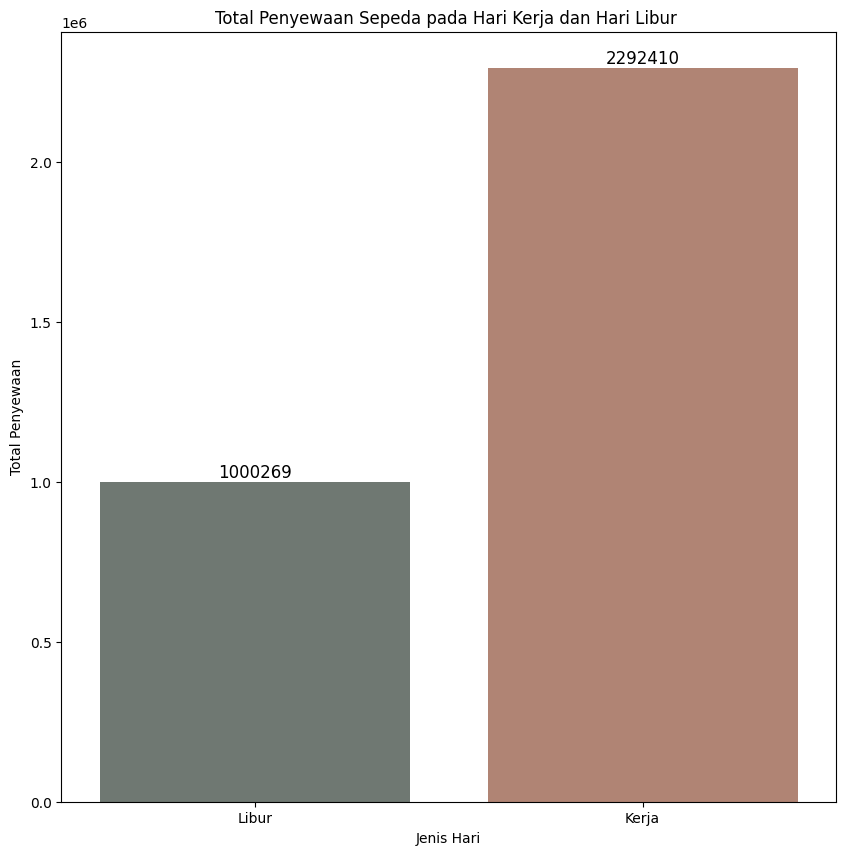

In [29]:
plt.figure(figsize=(10, 10))
ax = sns.barplot(x='jenis_hari', y='cnt', data=workingday_df, errorbar=None, palette=colors)

# Menambahkan label di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{round(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 7), textcoords='offset points', fontsize=12)

plt.title('Total Penyewaan Sepeda pada Hari Kerja dan Hari Libur ')
plt.xlabel('Jenis Hari')
plt.ylabel('Total Penyewaan')
plt.show()

Pertanyaan 5:
- Kondisi cuaca apa yang memiliki jumlah penyewaan terbanyak?

C:\Users\Nathanael JeshuaPaat\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nathanael JeshuaPaat\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nathanael JeshuaPaat\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


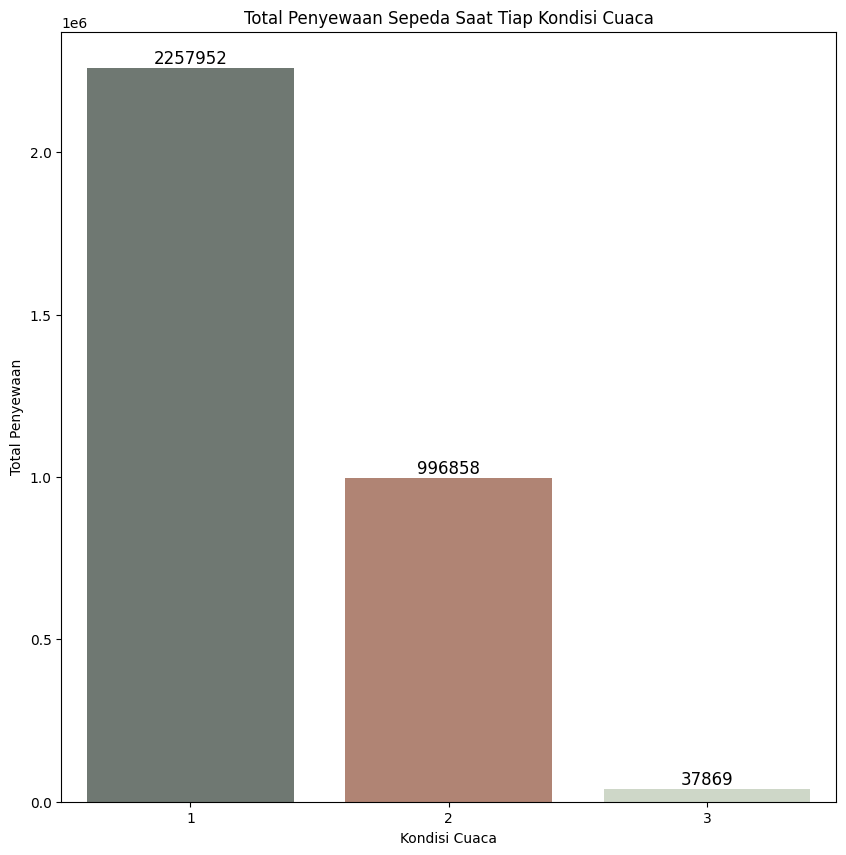

In [30]:
plt.figure(figsize=(10, 10))
bx = sns.barplot(x='weathersit', y='cnt', data=day_df, estimator='sum', errorbar=None, palette=colors)

#Menambahkan label di atas setiap bar
for p in bx.patches:
    bx.annotate(f'{round(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 7), textcoords='offset points', fontsize=12)

plt.title('Total Penyewaan Sepeda Saat Tiap Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Total Penyewaan')
plt.show()

# Conclusion

- Pertanyaan 1: Total penyewaan pada tahun 2012 adalah 2049576 dan pada tahun 2011 adalah 1243103 sehingga terjadi peningkatan dari tahun 2011 ke 2012.
- Pertanyaan 2: Keduanya memiliki tren naik dari Januari hingga Juni dan tren menurun dari September hingga Desember
- Pertanyaan 3: Jam puncak penyewaan terjadi pada jam ke-17
- Pertanyaan 4: Hari kerja memiliki jumlah penyewaan terbesar
- Pertanyaan 5: Kondisi cuaca ke-1 (Clear, Few clouds, Partly cloudy, Partly cloudy) memiliki jumlah penyewaan terbesar